<a href="https://colab.research.google.com/github/sreehariar04/python_practice/blob/main/Case_Study_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***LIBRARIES***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram

from sklearn.metrics import silhouette_score


# ***Data Pre-Processing***

In [2]:
adult_data = pd.read_csv('/content/adult_dataset.csv')
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [3]:
adult_data.info()
adult_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,46400.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,46400.000000
mean,38.679116,1.896641e+05,10.078089,1079.067626,87.502314,40.448599
std,13.952954,1.056040e+05,2.570973,7452.019058,403.004552,12.646992
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


## ***Check for duplicates***

In [4]:
adult_data.duplicated().sum()

np.int64(16)

In [5]:
adult_data.T.duplicated().sum()

np.int64(0)

### ***Handling Duplicates***

In [6]:
adult_data.drop_duplicates(inplace=True)

## ***Check for Null Values***

In [7]:
adult_data.isna().sum()

,0
age,2442
workclass,3362
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0


In [8]:
adult_data.replace('?', np.nan, inplace=True)

In [9]:
# adult_data.head()

In [10]:
adult_data.shape

(48826, 15)

## ***Seperating Numerical and Categorical Columns***

In [11]:
num_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
num_cols


['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [12]:
cat_cols = ['workclass','occupation','marital-status','relationship',
            'race','sex','native-country']

In [13]:
# Mode for categorical columns
for col in cat_cols:
    adult_data[col] = adult_data[col].fillna(adult_data[col].mode()[0])

# Median for numerical columns
adult_data[num_cols] = adult_data[num_cols].fillna(adult_data[num_cols].median())


In [14]:
adult_data.isna().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [15]:
adult_data.isna().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## ***Outlier Detection***

<Axes: >

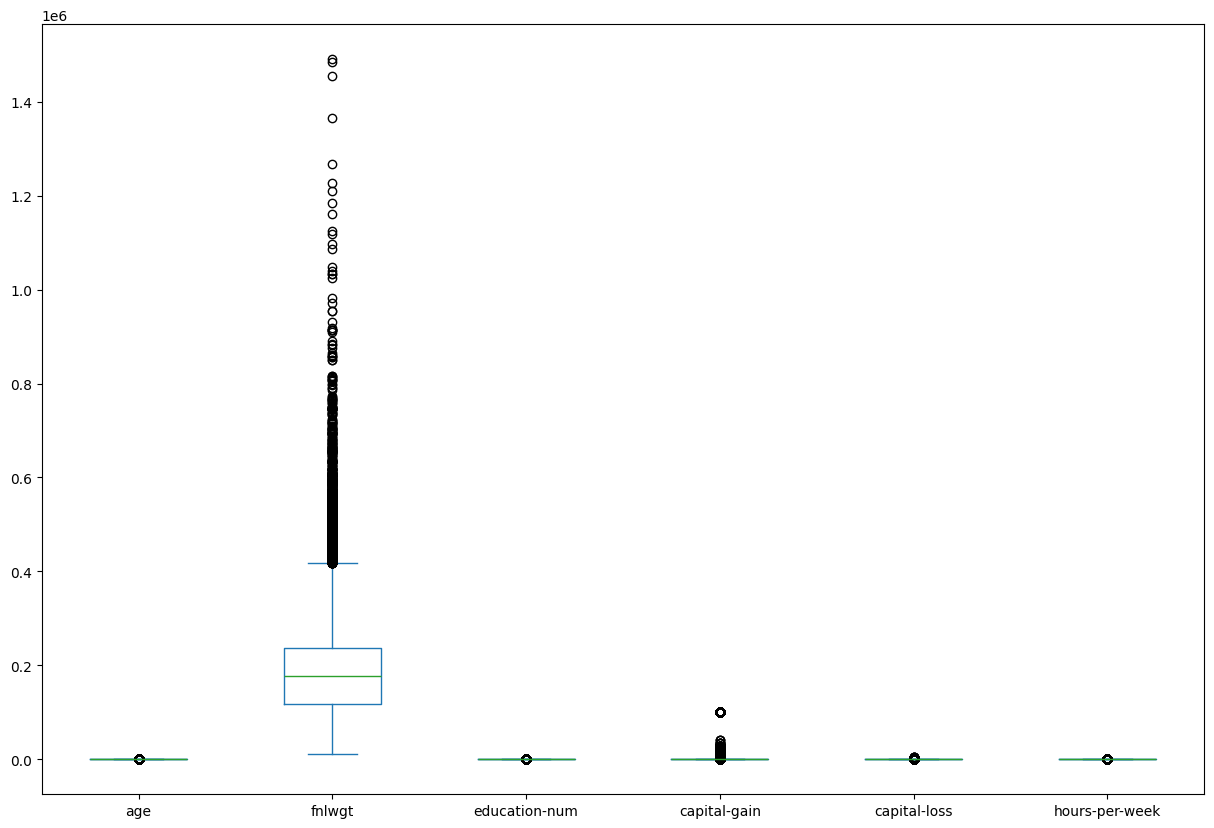

In [16]:
adult_data.plot(kind='box',layout=(2,4), figsize=(15,10))

## ***Outlier Removal***

In [17]:
for col in num_cols:
    Q1 = adult_data[col].quantile(0.25)
    Q3 = adult_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    adult_data[col] = np.clip(adult_data[col], lower_bound, upper_bound)



<Axes: >

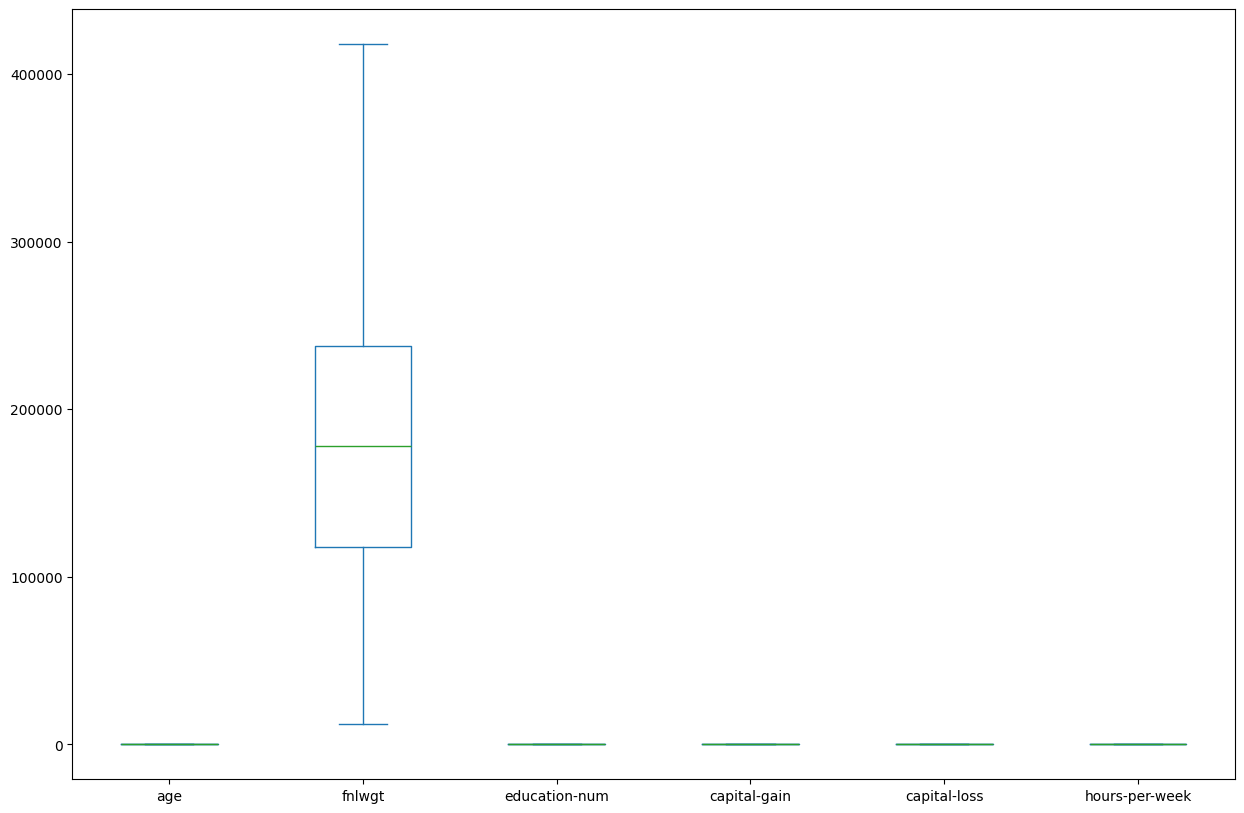

In [18]:
adult_data.plot(kind='box',layout=(2,4), figsize=(15,10))

# ***Feature Distributions***

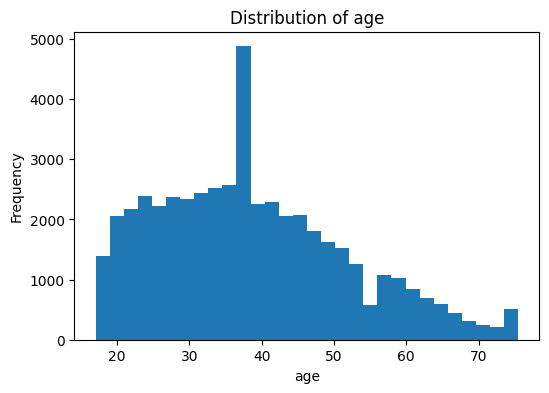

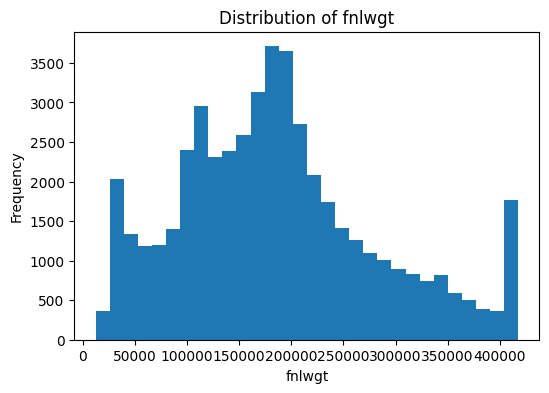

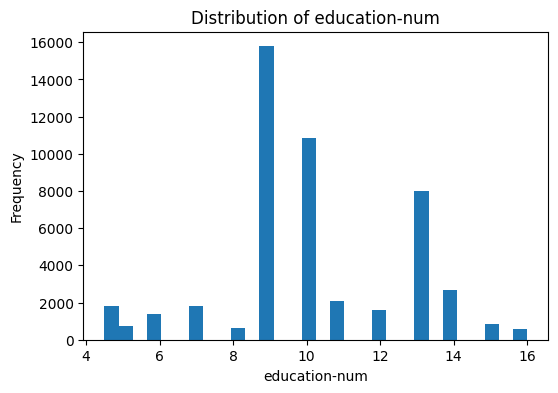

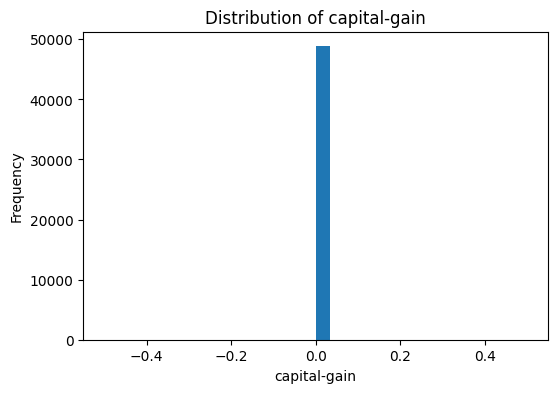

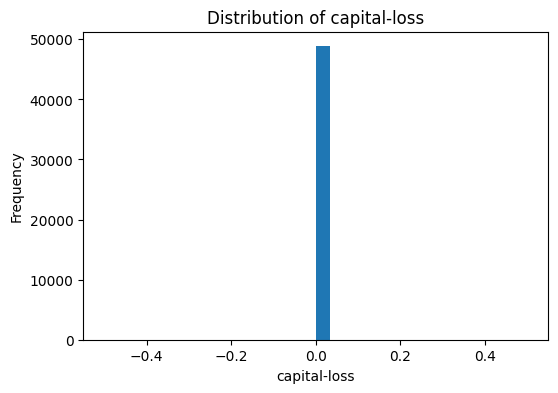

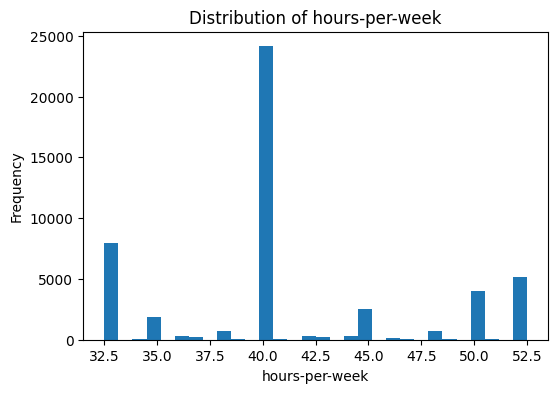

In [19]:
#NUmerical columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(adult_data[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

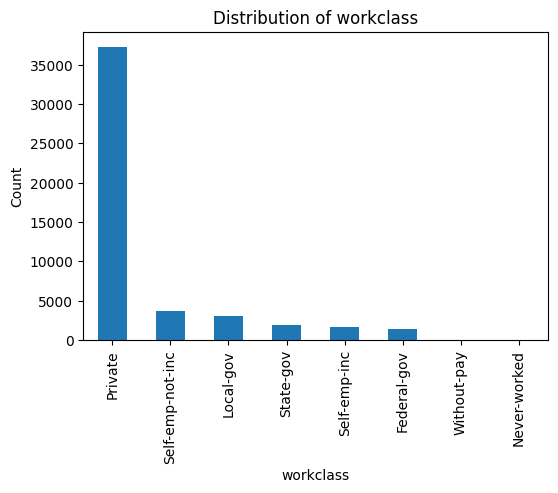

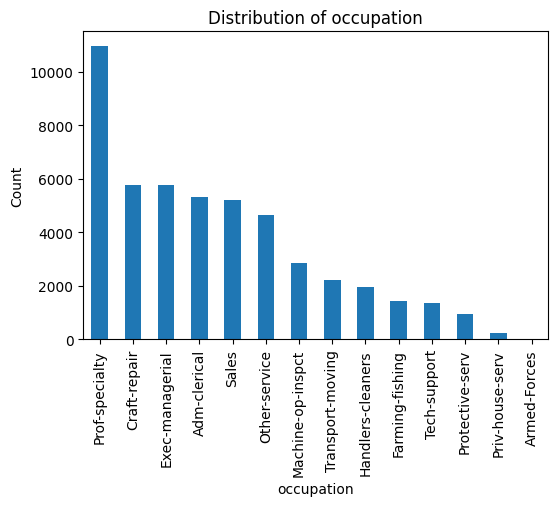

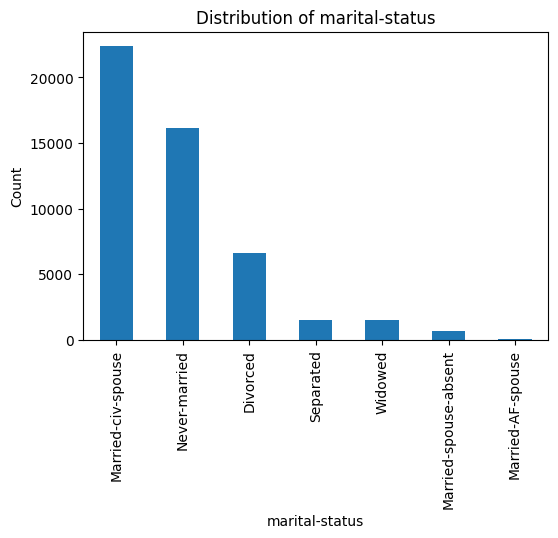

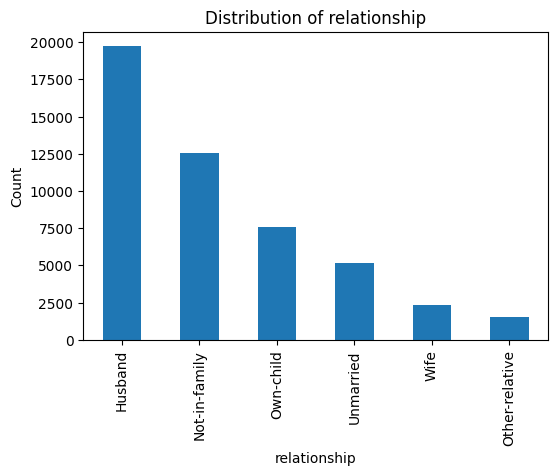

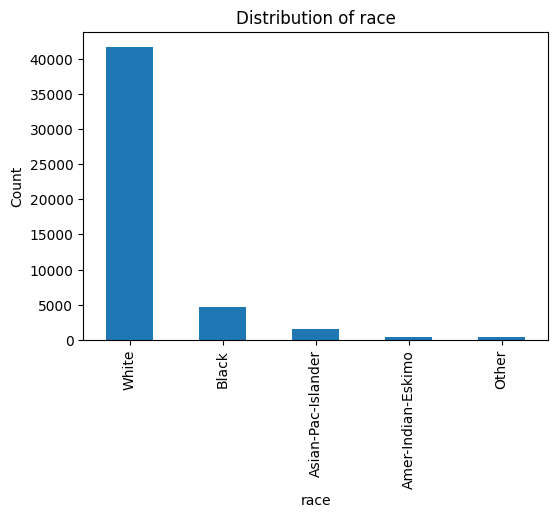

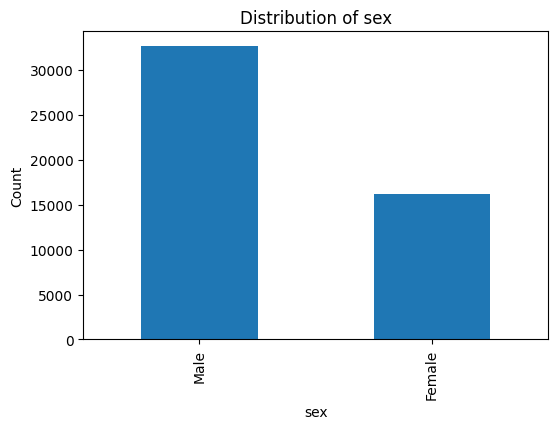

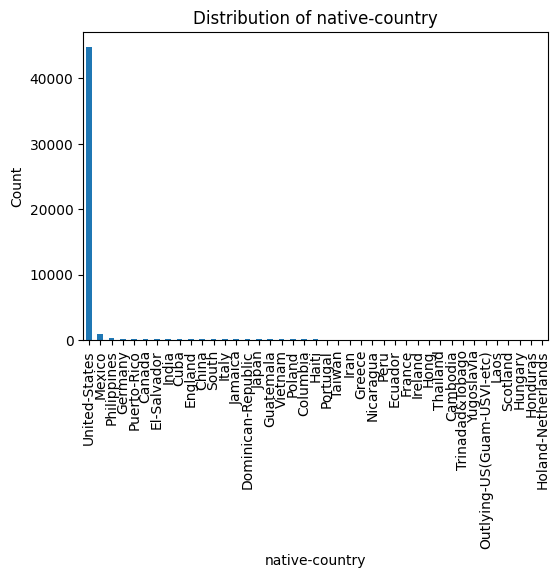

In [20]:
#Categorical Columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    adult_data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# ***Correlation Analysis***

In [21]:
corr_matrix = adult_data[num_cols].corr()
corr_matrix


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076939,0.041684,NaN,NaN,0.090607
fnlwgt,-0.076939,1.000000,-0.034830,NaN,NaN,-0.018404
education-num,0.041684,-0.034830,1.000000,NaN,NaN,0.177109
capital-gain,NaN,NaN,NaN,NaN,NaN,NaN
capital-loss,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,0.090607,-0.018404,0.177109,NaN,NaN,1.000000


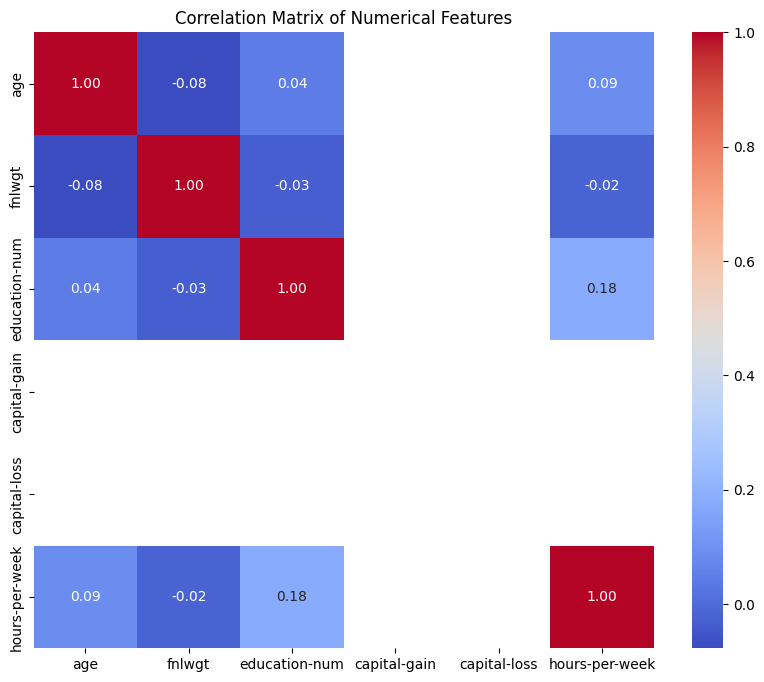

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [23]:
 # drop redundant and negative correlation features
adult_data = adult_data.drop(columns=['income','fnlwgt','education'])

# ***Encoding***

In [24]:
adult_encoded = pd.get_dummies(adult_data, columns=cat_cols, drop_first=True).astype(int)

In [25]:
adult_encoded.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,32,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
adult_encoded.dtypes.value_counts()


,count
int64,81


# ***Scaling***

In [27]:
# scale only numerical data

scaler = StandardScaler()
adult_scaled = scaler.fit_transform(adult_encoded)
adult_scaled


array([[ 0.03543012,  1.1583468 ,  0.        , ...,  0.29696812,
        -0.0412651 , -0.02170904],
       [ 0.86501516,  1.1583468 ,  0.        , ...,  0.29696812,
        -0.0412651 , -0.02170904],
       [-0.0399867 , -0.44150161,  0.        , ...,  0.29696812,
        -0.0412651 , -0.02170904],
       ...,
       [-0.0399867 ,  1.1583468 ,  0.        , ...,  0.29696812,
        -0.0412651 , -0.02170904],
       [ 0.41251423,  1.1583468 ,  0.        , ...,  0.29696812,
        -0.0412651 , -0.02170904],
       [-0.26623717,  1.1583468 ,  0.        , ...,  0.29696812,
        -0.0412651 , -0.02170904]])

# ***PCA***

In [28]:
pca = PCA().fit(adult_scaled)
explained_variance = pca.explained_variance_ratio_

import numpy as np
cum_var = np.cumsum(explained_variance)
print(cum_var)

[0.04055561 0.07180074 0.09845693 0.12239489 0.14403788 0.16479734
 0.18387856 0.20141843 0.21803829 0.23357782 0.24849106 0.26312515
 0.27749885 0.2916621  0.30575936 0.31961048 0.33327243 0.34680592
 0.36031376 0.37365372 0.3869111  0.39999955 0.41291124 0.4257715
 0.43859617 0.45136719 0.46408236 0.47678395 0.48948238 0.5021751
 0.51486355 0.5275484  0.54022912 0.55290806 0.56558669 0.57826226
 0.59093721 0.6036098  0.61628206 0.62895195 0.64162154 0.65428903
 0.66695605 0.67962081 0.69228001 0.70493598 0.71758658 0.73022661
 0.74285146 0.75545439 0.76804717 0.78059322 0.79311223 0.80556692
 0.81799664 0.83040349 0.84273718 0.85491953 0.86697368 0.87888134
 0.89061437 0.90214277 0.9135655  0.9247462  0.93530174 0.94562832
 0.95558814 0.96475233 0.9732966  0.98003157 0.98595703 0.99051419
 0.99457362 0.99707113 0.99852171 0.99935896 0.99983369 0.99995738
 1.         1.         1.        ]


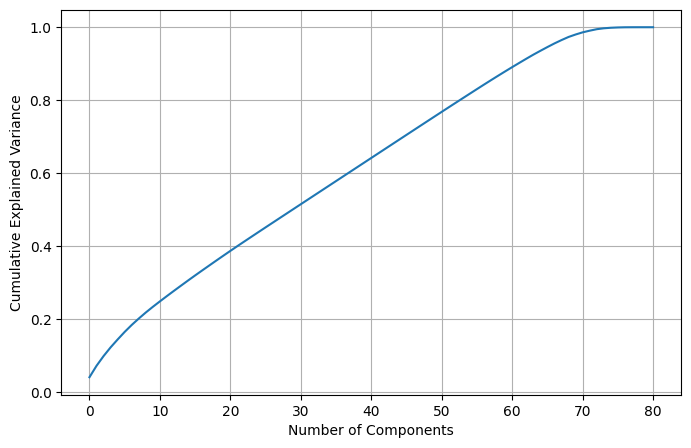

In [29]:
plt.figure(figsize=(8,5))
plt.plot(cum_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

In [30]:
pca = PCA(n_components=0.90)
adult_data_pca = pca.fit_transform(adult_scaled)

In [31]:
adult_pca = pd.DataFrame(
    adult_data_pca,
    columns=[f'PC{i+1}' for i in range(adult_data_pca.shape[1])]
)
print(adult_pca.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.069640  1.043237 -1.906823  1.936834 -0.816459 -1.507260 -0.718796   
1  2.824697  0.091228 -0.895172  0.614068 -0.149815 -1.250729  0.077043   
2 -0.548032  0.871541  1.022283 -0.268981 -0.144922  0.066973 -1.241220   
3 -0.215613 -1.476800  0.355941 -1.823632  3.524150 -0.056337 -0.515121   
4 -0.514929 -4.296990 -0.774679 -0.620097 -0.633117  1.223534  3.729072   

        PC8       PC9      PC10  ...      PC53      PC54      PC55      PC56  \
0 -0.918334 -0.514851 -0.322290  ...  0.590819  0.589293  1.117759  0.750940   
1  1.441200  1.060844  0.496325  ... -0.376452 -0.247344  0.237657 -0.259515   
2 -0.633536 -0.906330 -0.452383  ... -0.426245 -1.149527 -0.474188  1.153875   
3 -0.890586 -0.198036  0.251188  ... -0.373748 -1.200955 -0.230625  1.351382   
4 -2.189900  2.902189  1.493051  ... -2.978770  3.187099 -1.826056  1.351881   

       PC57      PC58      PC59      PC60      PC61      PC62  
0 -0

In [32]:
# Number of components chosen
print("Number of components:", pca.n_components_)

# Total variance retained
print("Total explained variance:", pca.explained_variance_ratio_.sum())


Number of components: 62
Total explained variance: 0.9021427668767056


# ***Clustering***

## ***KMeans Clustering***

In [33]:
# KMEANS

In [34]:
wcss = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(adult_pca) # or adult_scaled
    wcss.append(kmeans.inertia_)


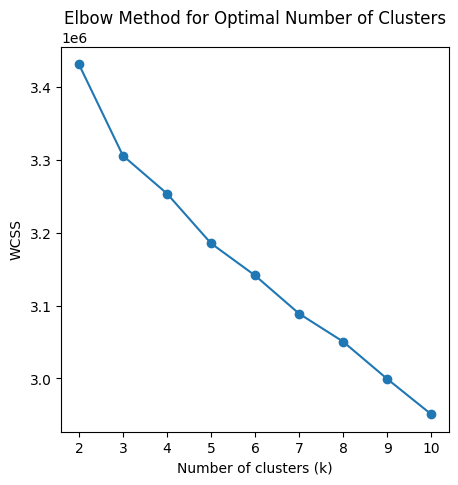

In [35]:
plt.figure(figsize=(5,5))
plt.plot(range(2,11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [36]:
sil = []

for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(adult_pca)
    sil_score = silhouette_score(adult_pca, labels)
    sil.append(sil_score)
    print(k, silhouette_score(adult_pca, labels))
# Find best k
best_index = sil.index(max(sil))
best_k = best_index + 2

print("Best number of clusters based on silhouette:", best_k)


2 0.8736801676098943
3 0.08568085496136223
4 0.08789854215772565
5 0.0803899581831011
6 0.09310756999213639
Best number of clusters based on silhouette: 2


In [37]:
best_k = 3  # Best number of clusters based on silhouette

kmeans = KMeans(
    n_clusters=best_k,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=0
)

labels = kmeans.fit_predict(adult_pca)  # PCA-reduced data

# Add cluster labels to original dataset
adult_data['cluster'] = labels


In [38]:
adult_data['cluster'].value_counts()


,count
cluster,
2,21205
1,20898
0,6723


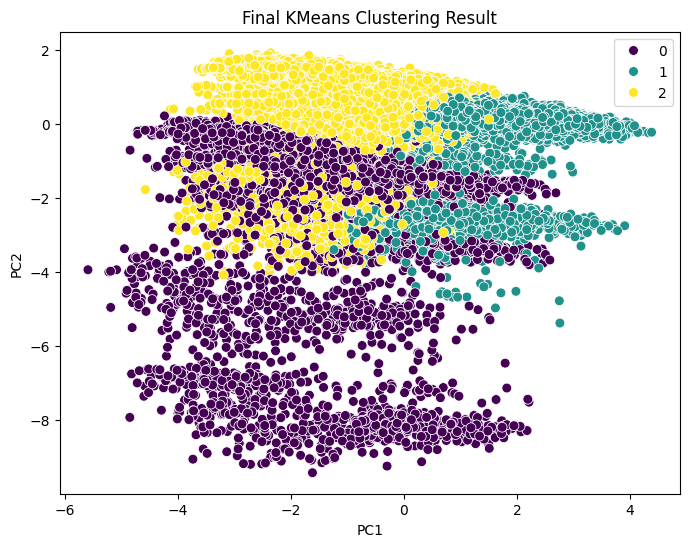

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=adult_pca.iloc[:, 0],
    y=adult_pca.iloc[:, 1],
    hue=labels,
    palette='viridis',
    s=50
)
plt.title('Final KMeans Clustering Result')
plt.show()


## ***Agglomerative Clustering***

In [40]:
X = np.array(adult_pca)

In [41]:
# # Perform hierarchical clustering
# Z = linkage(X, method='ward')

# # Plot dendrogram

# dendrogram(Z, truncate_mode='level', p=5)
# plt.title("Hierarchical Clustering Dendrogram")
# plt.xlabel("Data points")
# plt.ylabel("Distance")
# plt.show()

In [42]:
# sil_scores = {}

# for k in range(2, 11):   # silhouette requires at least 2 clusters
#     agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
#     labels = agg.fit_predict(X)
#     sil_scores[k] = silhouette_score(X, labels)
#     print(f"k = {k}, Silhouette Score = {sil_scores[k]:.4f}")


In [43]:
# best_k = 3
# agg = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
# labels = agg.fit_predict(adult_pca)  # or X_scaled

# # Add cluster labels to dataset
# data['agg_cluster'] = labels

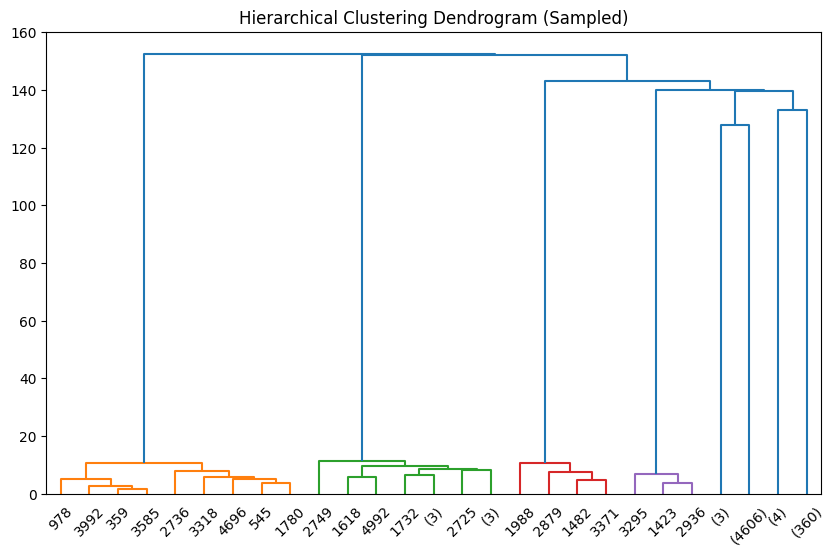

In [44]:
# Sample 5000 points for dendrogram
sample = np.random.choice(len(X), size=5000, replace=False)
X_sample = X[sample]

Z = linkage(X_sample, method='ward')

plt.figure(figsize=(10,6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Sampled)")
plt.show()


In [ ]:
sil_scores = {}

# Use X (NumPy array) consistently
for k in range(2, 5):   # silhouette requires at least 2 clusters
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agg.fit_predict(X)
    sil_scores[k] = silhouette_score(X, labels)
    print(f"k = {k}, Silhouette Score = {sil_scores[k]:.4f}")

best_k = max(sil_scores, key=sil_scores.get)
print("Best number of clusters:", best_k)


In [ ]:
agg = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
labels = agg.fit_predict(X)

# Add cluster labels to dataset
adult_data['agg_cluster'] = labels
